In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("Social_Network_Ads.csv")

In [6]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
data.info()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.head()

In [ ]:
x=data.iloc[:,[2,3]].values #Input data only

In [8]:
y=data.iloc[:,[4]].values #Output data only

In [9]:
#How to remove warnings in jupyter Notebook
import warnings
warnings.simplefilter("ignore")

In [10]:
# feature scaling to Age & EstimatedSalary
from sklearn.preprocessing import StandardScaler
x=ss.fit_transform(x)
x

NameError: name 'ss' is not defined

In [11]:
x.ndim

NameError: name 'x' is not defined

In [12]:
from sklearn.model_selection import train_test_split #module for Splitting data & shuffel
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

NameError: name 'x' is not defined

In [13]:
x_train.ndim

NameError: name 'x_train' is not defined

In [14]:
y_train.ndim

NameError: name 'y_train' is not defined

In [15]:
x_test.ndim

NameError: name 'x_test' is not defined

In [16]:
y_test.ndim

NameError: name 'y_test' is not defined

In [17]:
#Load KNN Classfier & apply
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11, metric='euclidean',p=2)
knn.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [18]:
pred=knn.predict(x_test)

NameError: name 'x_test' is not defined

In [19]:
pred.ndim

NameError: name 'pred' is not defined

In [20]:
y_test=y_test.flatten()

NameError: name 'y_test' is not defined

In [21]:
pred

NameError: name 'pred' is not defined

In [22]:
y_test

NameError: name 'y_test' is not defined

# How to find out Misclassfied samples.

In [213]:
np.where(pred!=y_test)

(array([ 2,  3,  7, 11, 78, 80, 93], dtype=int64),)

In [214]:
np.where(pred!=y_test)

(array([ 2,  3,  7, 11, 78, 80, 93], dtype=int64),)

# Confusion Metrix

In [215]:
#Using confusion matrix we can find out in testing data how many.
#Wrong & Correct prediction data.
#First load liberary of Confusion Matrix
from sklearn.metrics import confusion_matrix

In [216]:
cm=confusion_matrix(pred,y_test)

In [228]:
cm

array([[64,  2],
       [ 5, 29]], dtype=int64)

In [218]:
# [48+27=75] is correct prediction & 
# [4+1=5] is wrong prediction.

# Plotting Heatmap

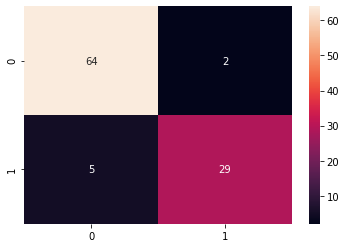

In [219]:
import seaborn as sb
sb.heatmap(cm,annot=True)

# Showing in visualization

In [1]:
from matplotlib.colors import ListedColormap
X_set,Y_set=x_test, y_test
X1,X2=np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                 np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))

plt.contour(X1,X2,knn.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(("red","green")))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j,0],X_set[Y_set==j,1],
               c=ListedColormap(("red","green"))(i),label=j)
    
plt.title("KNN Testing dataset")
plt.xlabel("Age")
plt.ylabel("Estimatd Salary")
plt.legend()
plt.show()

NameError: name 'x_test' is not defined

In [223]:
x_test.shape

(100, 2)

# Accuracy model

In [166]:
# Prediction score checking using accuracy.score model
from sklearn.metrics import accuracy_score
ac=accuracy_score(pred,y_test)
ac

0.9375

# Precision & Recall

In [167]:
from sklearn.metrics import precision_score, recall_score

In [168]:
print(precision_score(pred,y_test))

0.9642857142857143


In [169]:
print(recall_score(pred,y_test))

0.8709677419354839


# F1 Score

In [170]:
from sklearn.metrics import f1_score

In [224]:
print(f1_score(pred,y_test))

0.8923076923076922


# Will check by putting different value of K in KNN.


In [290]:
from sklearn.neighbors import KNeighborsClassifier
lst=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    #lst.append(np.mean(pred))
    lst.append(np.count_nonzero(pred))
    #lst.append(np.mean(np.where(pred!=y_test)))
    #lst.append(len(np.where(pred!=y_test)))

In [291]:
#np.count(np.where(pred!=y_test))
np.where(pred!=y_test)

(array([ 2,  3,  7, 11, 78, 80, 93], dtype=int64),)

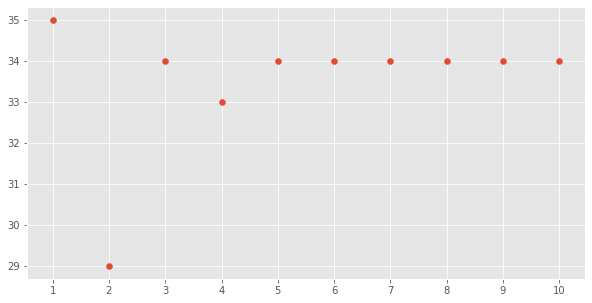

In [292]:
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.scatter(range(1,11),lst)
plt.xticks(range(1,11))
plt.show()

In [293]:
lst

[35, 29, 34, 33, 34, 34, 34, 34, 34, 34]

In [295]:
x.shape

(400, 2)

In [297]:
y.shape

(400, 1)

# Lets make a another model by putting k values as 4

In [335]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [311]:
x_test.shape

(100, 2)

In [337]:
from sklearn.neighbors import KNeighborsClassifier

In [338]:
knn=KNeighborsClassifier(n_neighbors=4)

In [339]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [341]:
knn.predict(x_test)

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [342]:
np.where(pred!=y_test.flatten())

(array([ 2,  3,  7, 11, 78, 80, 93], dtype=int64),)

In [343]:
from sklearn.metrics import accuracy_score

In [344]:
acc=accuracy_score(pred,y_test)

In [347]:
acc

0.93